In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [9]:
df = pd.read_csv("breast-cancer.csv")

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [15]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in id is 569
No. of unique values in diagnosis is 2
No. of unique values in radius_mean is 456
No. of unique values in texture_mean is 479
No. of unique values in perimeter_mean is 522
No. of unique values in area_mean is 539
No. of unique values in smoothness_mean is 474
No. of unique values in compactness_mean is 537
No. of unique values in concavity_mean is 537
No. of unique values in concave points_mean is 542
No. of unique values in symmetry_mean is 432
No. of unique values in fractal_dimension_mean is 499
No. of unique values in radius_se is 540
No. of unique values in texture_se is 519
No. of unique values in perimeter_se is 533
No. of unique values in area_se is 528
No. of unique values in smoothness_se is 547
No. of unique values in compactness_se is 541
No. of unique values in concavity_se is 533
No. of unique values in concave points_se is 507
No. of unique values in symmetry_se is 498
No. of unique values in fractal_dimension_se is 545
No. of unique val

In [21]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

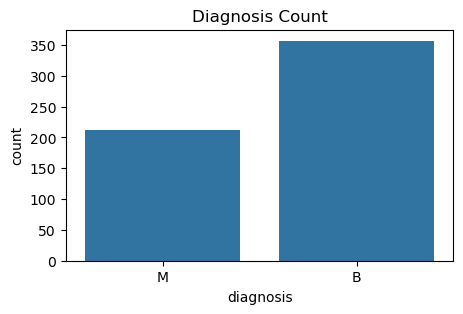

In [27]:
plt.figure(figsize=(5,3))
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Count')
plt.show()

In [33]:
df.groupby(df.diagnosis).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [35]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [37]:
df.duplicated().sum()

0

In [41]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


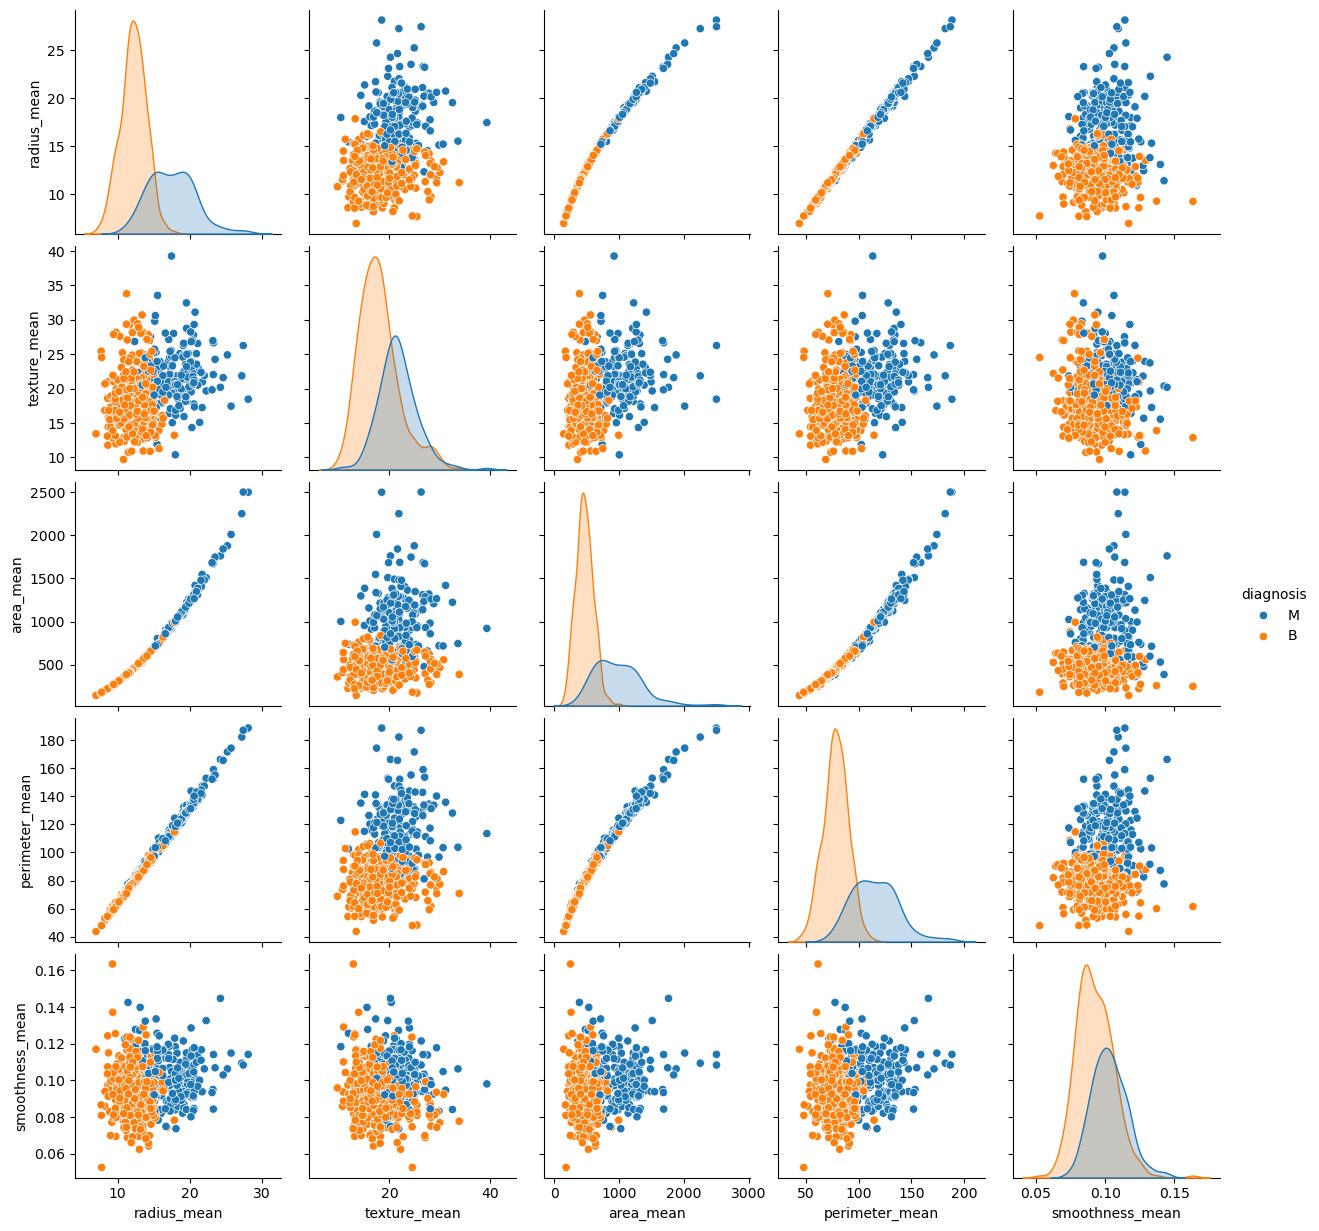

In [43]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean',"smoothness_mean"])
plt.show()

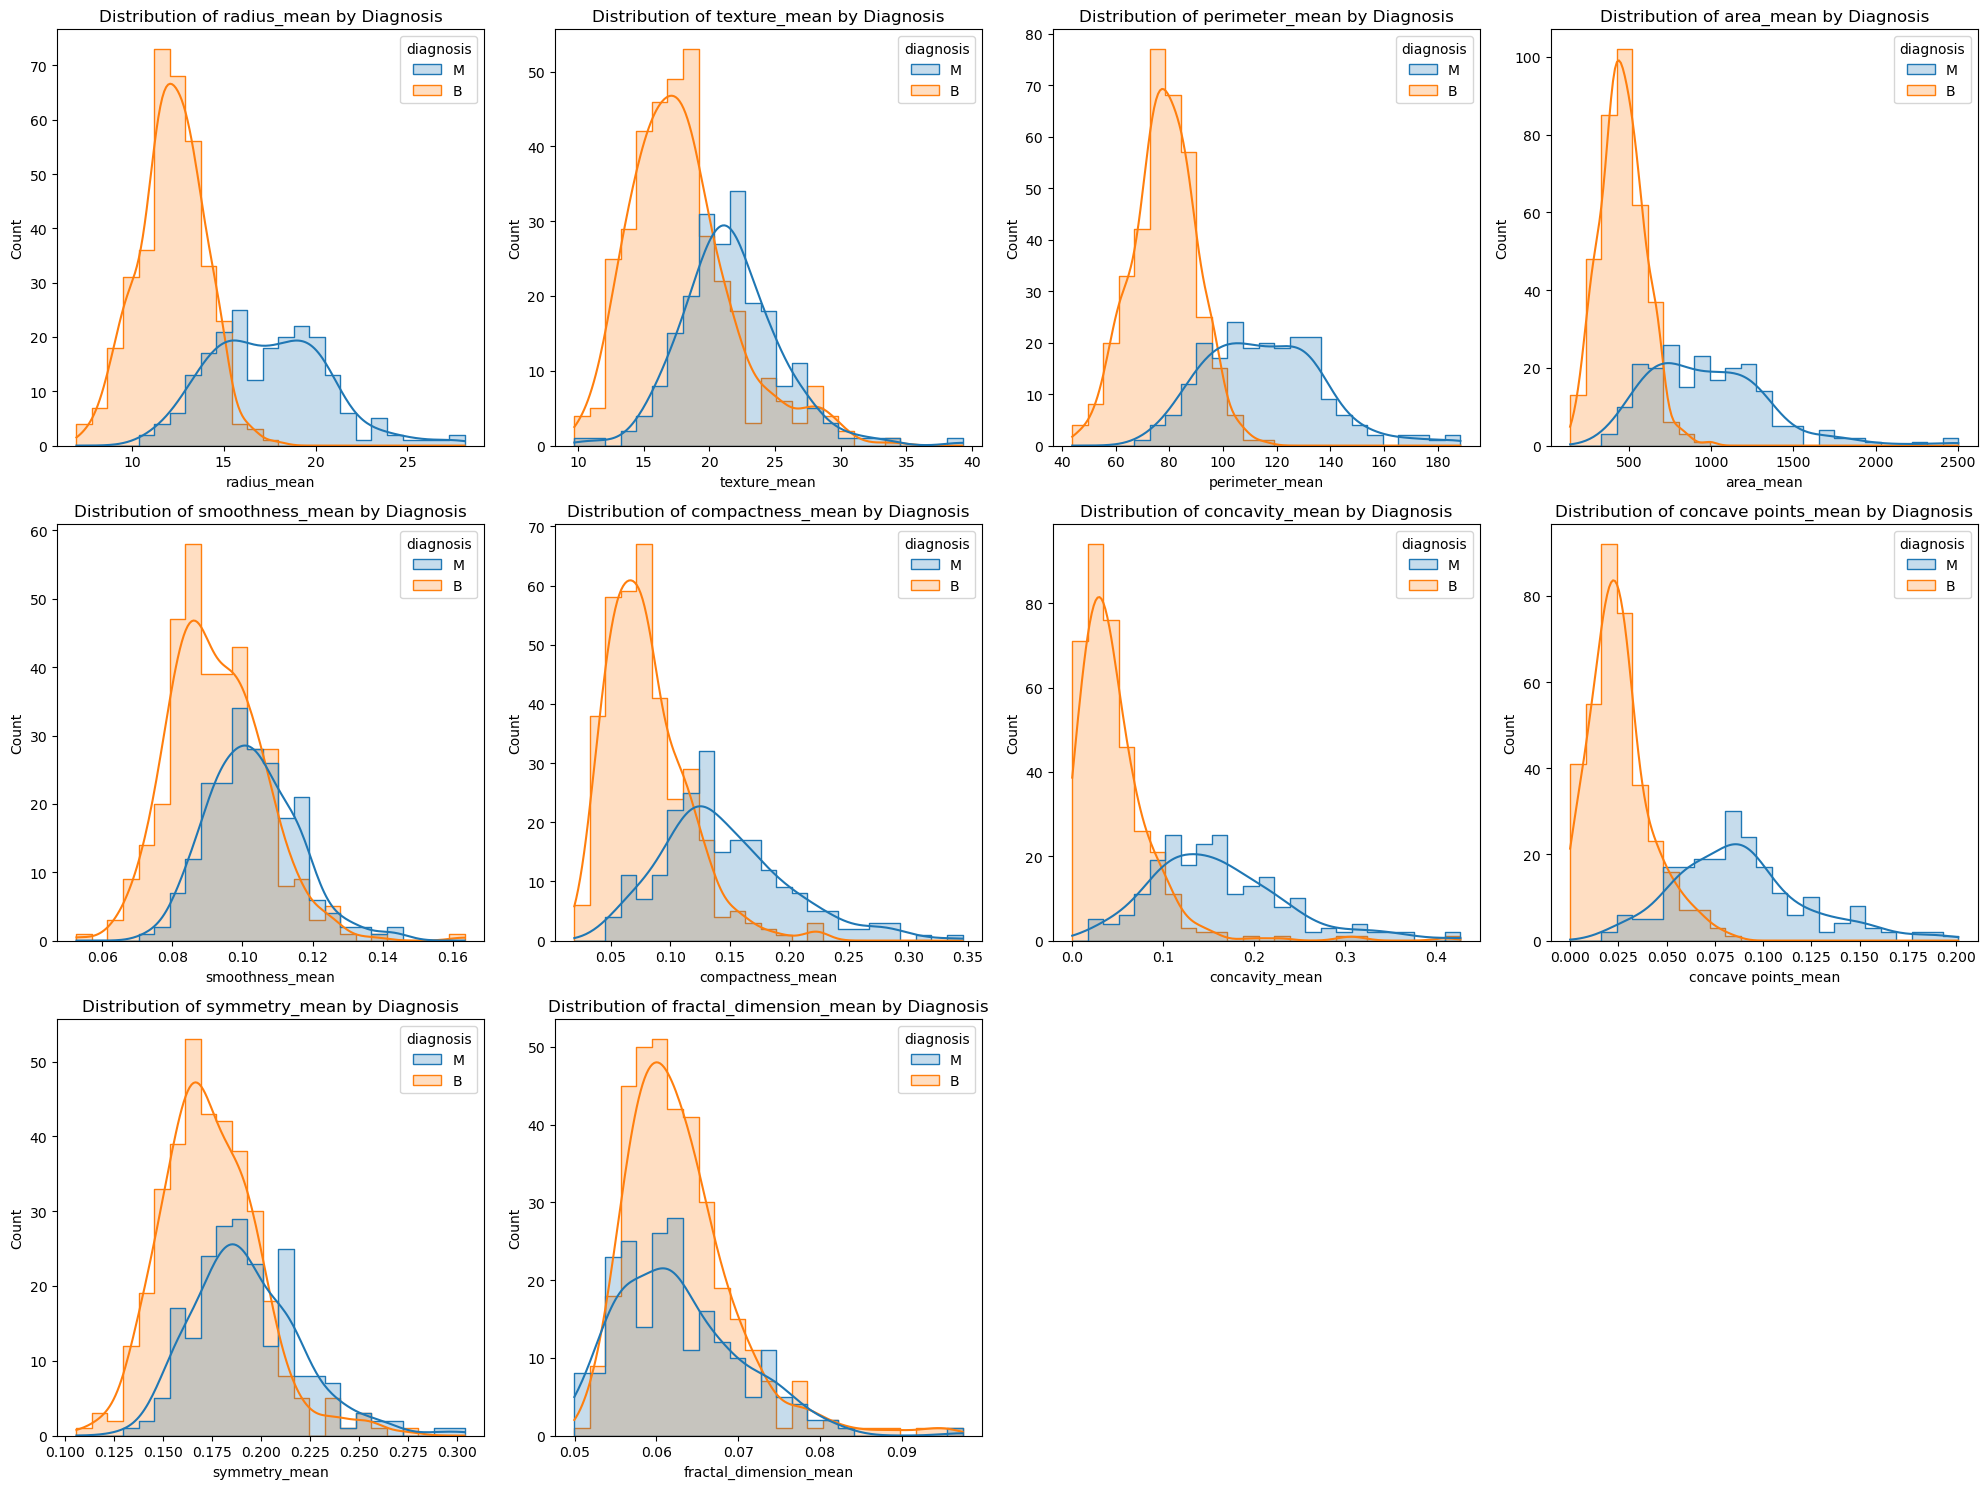

In [45]:
mean_columns = df.columns[2:12]  # Selecting columns related to mean features
plt.figure(figsize=(20,15))

for i, column in enumerate(mean_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=column, hue='diagnosis', kde=True, element="step", bins=25)
    plt.title(f'Distribution of {column} by Diagnosis')

plt.tight_layout()
plt.show()

In [47]:
X=df.drop(['id','diagnosis'],axis=1)
y=df['diagnosis'].map(lambda x: 1 if x == 'M' else 0)

In [49]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [51]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [63]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.15840,0.12020,0.000000,0.00000,0.2932,0.09382
92,13.270,14.76,84.74,551.7,0.07355,0.05055,0.032610,0.026480,0.1386,0.05318,...,16.36,22.35,104.50,830.6,0.10060,0.12380,0.135000,0.10010,0.2027,0.06206
208,13.110,22.54,87.02,529.4,0.10020,0.14830,0.087050,0.051020,0.1850,0.07310,...,14.55,29.16,99.48,639.3,0.13490,0.44020,0.316200,0.11260,0.4128,0.10760
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289
360,12.540,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,0.05185,...,13.72,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14.020,15.66,89.59,606.5,0.07966,0.05581,0.020870,0.026520,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.062600,0.08216,0.2136,0.06710
311,14.610,15.69,92.68,664.9,0.07618,0.03515,0.014470,0.018770,0.1632,0.05255,...,16.46,21.75,103.70,840.8,0.10110,0.07087,0.047460,0.05813,0.2530,0.05695
407,12.850,21.37,82.63,514.5,0.07551,0.08316,0.061260,0.018670,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.183800,0.05601,0.2488,0.08151
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.321900,0.11080,0.2827,0.09208


In [65]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
463,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,12.770,24.02,82.68,495.1,0.13420,0.1808,0.1860,0.08288,0.3210,0.07863
147,14.950,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,0.1744,0.06493,...,16.250,25.47,107.10,809.7,0.09970,0.2521,0.2500,0.08405,0.2852,0.09218
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
28,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,20.270,36.71,149.30,1269.0,0.16410,0.6110,0.6335,0.20240,0.4027,0.09876
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.02565,0.01510,0.1678,0.07126,...,9.473,18.45,63.30,275.6,0.16410,0.2235,0.1754,0.08512,0.2983,0.10490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,14.960,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,16.250,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
354,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,0.06083,...,12.120,15.82,79.62,453.5,0.08864,0.1256,0.1201,0.03922,0.2576,0.07018
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
65,14.780,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,0.06654,...,17.310,33.39,114.60,925.1,0.16480,0.3416,0.3024,0.16140,0.3321,0.08911


In [67]:
y_train

101    0
92     0
208    0
58     0
360    0
      ..
439    0
311    0
407    0
421    0
309    0
Name: diagnosis, Length: 455, dtype: int64

In [69]:
y_test

463    0
147    0
2      1
28     1
525    0
      ..
291    0
354    0
68     0
65     1
409    0
Name: diagnosis, Length: 114, dtype: int64

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [75]:
X_train
y_train
X_test
y_test

463    0
147    0
2      1
28     1
525    0
      ..
291    0
354    0
68     0
65     1
409    0
Name: diagnosis, Length: 114, dtype: int64

In [77]:
compare=pd.DataFrame({'Model':[], "Training Accuracy":[], "Testing Accuracy":[], "F1 Score":[], "Recall":[], 
                     "Precision":[]})
compare

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision


In [81]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [83]:
LR.fit(X_train,y_train)

LogisticRegression()

In [85]:
y_pred=LR.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [89]:
from sklearn.metrics  import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.98      1.00      0.99        47

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [91]:
from sklearn.metrics  import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
train_acc=LR.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9912280701754386
F1 Score : 0.9894736842105263
Recall : 1.0
Precision : 0.9791666666666666


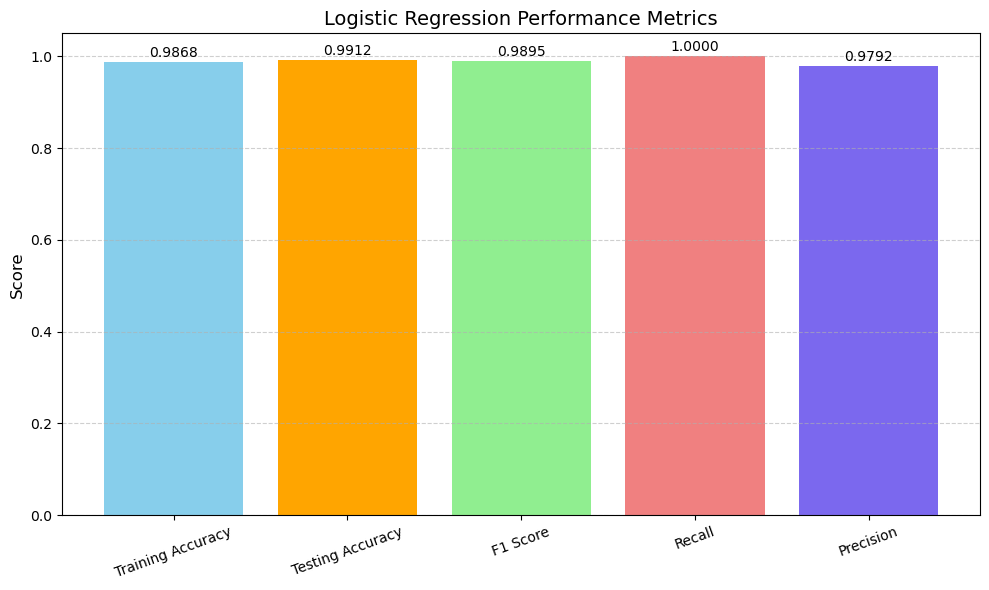

In [113]:
import matplotlib.pyplot as plt
metrics = {
    "Training Accuracy": 0.9868131868131869,
    "Testing Accuracy": 0.9912280701754386,
    "F1 Score": 0.9894736842105263,
    "Recall": 1.0,
    "Precision": 0.9791666666666666
}

names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(names, values, color=['skyblue', 'orange', 'lightgreen', 'lightcoral', 'mediumslateblue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.4f}", ha='center', va='bottom', fontsize=10)

plt.ylim(0, 1.05)
plt.title("Logistic Regression Performance Metrics", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [117]:
import numpy as np

new_patient_data = np.array([[14.5, 20.2, 96.7, 658.6, 0.1, 0.12, 0.1, 0.07, 0.18, 0.06,
                              0.5, 1.2, 3.2, 50.0, 0.005, 0.03, 0.04, 0.01, 0.02, 0.003,
                              16.5, 25.4, 110.5, 800.1, 0.15, 0.25, 0.25, 0.1, 0.25, 0.08]])

new_patient_scaled = scaler.transform(new_patient_data)

prediction = LR.predict(new_patient_scaled)

print("Prediction:", "The tumor is Malignant (cancerous)" if prediction[0] == 0 else "The tumor is Benign (non-cancerous)")

Prediction: The tumor is Benign (non-cancerous)
